In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [66]:
url='https://tw.appledaily.com/home/' #蘋果新聞網的頭條標題爬取
res=requests.get(url)
soup=BeautifulSoup(res.text,'html.parser')
title=soup.find_all('div', class_='storycard-headline text_greyish-brown-two')
titles=[t.find('span',class_='headline truncate truncate--3').text for t in title]
text=str(titles).replace(' ','\n').replace('\\u3000','').replace('[','').replace(']','')
print(text)

'軍人當眾槍擊前女友胸部36秒奪命影片曝光',
'獨家｜慟！《鳥來伯》長青因心臟宿疾辭世享壽76歲遺願曝光',
'「刺青妹吹喇叭片」千人求上車女主角崩潰！老司機竟是閨蜜',
'病例總整理｜AZ疫苗開打2天全台11老人猝死！死因待查',
'獨家專訪｜長青女兒悲吐亡父臨終無人相伴晚年回憶「這一生很精采」',
'人妻引狼入室！老公外遇她找友訴苦卻擦槍走火劇情神展開',
'疫情殯葬壓力爆表！小冬瓜這回送自己親人一句「火來了快跑」徹底淚崩',
'防疫記者會陳時中淡淡回應女記者「你很敏銳」！鄉民都嗨了',
'航警局第一個打AZ的人！炫耀「上班7年過退休生活」惹怒警署工作跟研究所都GG',
'「疫情不可怕了」他罵陳時中團隊笨透了：撤銷三級警戒吧！',
'台中94歲翁昨打疫苗今晨喝水竟從嘴邊流出...妻驚覺「人沒有了」',
'C羅就是狂！記者會的1個move竟讓可口可樂市值瞬間蒸發40億美元',
'女星嫁豪門不到3年爆婚變富三代尪不給生冷戰分居',
'郭台銘BNT疫苗有譜！國台辦正面允諾郭辦回應了',
'9旬婦打疫苗12小時後猝死沒三高也無慢性病！家屬無奈說這句話',
'愛國同心會會長周慶峻染疫病逝新黨發言人批「政府殺人」',
'演藝大亨竟是狼！騙追星女陪睡拍裸照分飾四角被逮辯「開玩笑」',
'直擊！台南悍女「壁咚」逮捕無罩男自認抓「現行犯」反吃官司',
'航警炫「每天過退休生活」慘遭免職律師：打官司可能翻盤',
'男子躺台灣大道警消走近嚇一跳：面目全非死掉了',
'咬破10斤白酒酒桶偷喝調皮狗醉到只剩眼球轉轉轉',
'抒壓片│戰痘女醫再發功！婦人胳肢窩生痘痘擠出油黃義大利麵條',
'人夫偷吃健身房女員工！法官當庭聽她淫叫10秒「應是本人」',
'香腸伯辭世｜長青《傻女婿》草根味濃挺過心臟死劫二婚小31歲妻',
'一杯梅酒就倒！男士官寢室性侵女同袍還拍片',
'香腸伯辭世｜《天天開心》搭擋康弘不捨憶2個月前最後相見',
'獨家｜驗車系統大當機！民眾排隊苦等2小時怒轟：增加染疫風險',
'第11死！士林9旬老翁上午打疫苗傍晚身體不適死亡',
'首例！高鐵站務人員確診媽媽在醫院工作、打過莫德納疫苗仍染全家',
'畫面曝光｜台中長髮妹開小鴨講電話闖紅燈遭撞翻肚！濺血5傷',
'獨家｜全台接種11人猝死長輩拒打前必看！醫曝疫苗風險一個關鍵時間',
'NHK:
東京奧運擬開放觀眾入場

人數

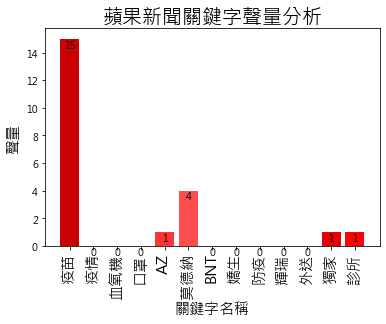

In [7]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  #聲量分析
colrogroup2 = ['#cd0003','#e60003','#ff0004','#ff1a1d','#ff3436','#ff4d4f','#ff6768','#ff8181','#ff9a9b','#ffb4b4']
keywords = ['疫苗','疫情','血氧機','口罩','AZ',
'莫德納','BNT','嬌生','防疫','輝瑞','外送','獨家','診所']
key_count=[]

for name in keywords:
    count=0
    for mentioned in titles:
        if name in str(mentioned):
            count+=1
    key_count.append(count)

plt.bar(keywords,key_count,color=colrogroup2)
plt.xticks(fontsize=15,rotation=90)
for index,titles in enumerate(key_count):
    plt.text(x=index,y=titles,s=titles,verticalalignment='top',horizontalalignment='center')
plt.xlabel('關鍵字名稱',fontsize=15)
plt.ylabel('聲量',fontsize=15)
plt.title('蘋果新聞關鍵字聲量分析',fontsize=20)
plt.show()

In [11]:
from snownlp import SnowNLP

In [20]:
title_ls = [i.strip(",'") for i in text.split('\n')] #把爬下來的標題整理一下
title_ls = [i for i in title_ls if i!='']
title_ls

['陳其邁搶先宣布！高雄孕婦6/23起打莫德納中央打槍：這三類才能挑',
 '高嘉瑜「得寸進尺」內容曝光5度傳訊北市衛生局長為禾馨喬疫苗、還要莫德納',
 '陳其邁怒了！蚵仔寮魚市湧人潮他只給1天改善：做不到就關門',
 '友邦巴拉圭預購100萬劑聯亞製造疫苗就等台灣緊急授權',
 '保單紓困｜比勞工貸優惠！下月起每家保險公司1人1保單可借10萬元',
 '邱毅赴廈門打疫苗讓中國歡呼盤點這些人都去了',
 '米砂裙底露餡黑黑的網驚放大照片看！她親自回應了',
 '還好辣個男人神救援！補教名師：民進黨2022從預料慘敗到出現轉圜',
 '台南檢察長爆特權偷打疫苗檢察官怒控貪污！黃國昌籲部長總長速究責',
 '新婚人妻夜奔小王家「玩手遊」夫捉姦驚見滿屋人',
 '晶片換疫苗全民熱議謝金河：台積電是有威力的！',
 '傳播妹昏睡遭熟客性侵怒問「為何睡我」！他竟答：又不是第一次',
 '雨彈來襲！高雄桃源等5區明停班停課疫苗不打了',
 '勞工紓困貸｜客訴接不完！銀行曝：這2種人線上申辦被打槍機率高',
 '獨家｜台中今暴增5人打疫苗後死亡盧秀燕說話了',
 '台中6月爆10起死亡車禍7件是超速！警察今起大執法',
 '傻眼！百公尺9秒89跑不進奧運美國短跑實力太誇張',
 '又是冷藏庫！日本再報廢千餘劑新冠肺炎疫苗北海道大阪都出包',
 '迷姦人妻無恥狡辯「是我被下藥」診所主任判賠129萬坐牢10年',
 '士林長照48染疫3死給柯Ｐ教訓「打過疫苗還中招、普篩潛伏期傳給一狗票人」',
 '埔里休旅車冒煙開門赫見一對20歲男女明顯死亡',
 '全球股市不斷更新｜美股大跌後反攻道瓊早盤大漲逾500點',
 '指台灣當小弟收疫苗鄭運鵬兩句話酸爆柯文哲高嘉瑜',
 '再嗆柯文哲甩鍋林右昌：我是真的覺得很不爽！',
 '不只好心肝！振興醫院找8名「志工」和連戰夫婦分享同瓶疫苗黃珊珊：要查身份',
 '廣告大亨被小三爆「做愛不戴套」正宮驚收親密照！全因他有了小四',
 '謝忻因他出一張嘴縫11針腳爆血「啵啵」流！「天團男團員」事不關己',
 '諷刺！彰化里長妻起壇驅疫4人確診足跡釀7縣市宗教群聚新風暴',
 '屏東女僅穿內衣倚門比出「1」手勢玩完惹',
 '病例總整理｜打疫苗84人猝死屏東嬤早上接種疫苗！中午送急診（不斷更新）',
 '撿便宜懶人包｜五賀拉麵挺醫護人員外帶拉麵品項半價

In [30]:
procce_dt = {idx:{'sentence':sent} for idx, sent in enumerate(title_ls)}
procce_dt

{0: {'sentence': '陳其邁搶先宣布！高雄孕婦6/23起打莫德納中央打槍：這三類才能挑'},
 1: {'sentence': '高嘉瑜「得寸進尺」內容曝光5度傳訊北市衛生局長為禾馨喬疫苗、還要莫德納'},
 2: {'sentence': '陳其邁怒了！蚵仔寮魚市湧人潮他只給1天改善：做不到就關門'},
 3: {'sentence': '友邦巴拉圭預購100萬劑聯亞製造疫苗就等台灣緊急授權'},
 4: {'sentence': '保單紓困｜比勞工貸優惠！下月起每家保險公司1人1保單可借10萬元'},
 5: {'sentence': '邱毅赴廈門打疫苗讓中國歡呼盤點這些人都去了'},
 6: {'sentence': '米砂裙底露餡黑黑的網驚放大照片看！她親自回應了'},
 7: {'sentence': '還好辣個男人神救援！補教名師：民進黨2022從預料慘敗到出現轉圜'},
 8: {'sentence': '台南檢察長爆特權偷打疫苗檢察官怒控貪污！黃國昌籲部長總長速究責'},
 9: {'sentence': '新婚人妻夜奔小王家「玩手遊」夫捉姦驚見滿屋人'},
 10: {'sentence': '晶片換疫苗全民熱議謝金河：台積電是有威力的！'},
 11: {'sentence': '傳播妹昏睡遭熟客性侵怒問「為何睡我」！他竟答：又不是第一次'},
 12: {'sentence': '雨彈來襲！高雄桃源等5區明停班停課疫苗不打了'},
 13: {'sentence': '勞工紓困貸｜客訴接不完！銀行曝：這2種人線上申辦被打槍機率高'},
 14: {'sentence': '獨家｜台中今暴增5人打疫苗後死亡盧秀燕說話了'},
 15: {'sentence': '台中6月爆10起死亡車禍7件是超速！警察今起大執法'},
 16: {'sentence': '傻眼！百公尺9秒89跑不進奧運美國短跑實力太誇張'},
 17: {'sentence': '又是冷藏庫！日本再報廢千餘劑新冠肺炎疫苗北海道大阪都出包'},
 18: {'sentence': '迷姦人妻無恥狡辯「是我被下藥」診所主任判賠129萬坐牢10年'},
 19: {'sentence': '士林長照48染疫3死給柯Ｐ教訓「打過疫苗還中招、普篩潛伏期傳給一狗票人」'},


In [36]:
for idx, sent_dt in procce_dt.items():
    snow = SnowNLP(sent_dt['sentence'])
    procce_dt[idx]['words'] = snow.words #斷詞
    procce_dt[idx]['tags'] = list(snow.tags) #詞性
    procce_dt[idx]['sentiments'] = snow.sentiments #情感分析
    procce_dt[idx]['pinyin'] = snow.pinyin #拼音
    procce_dt[idx]['keywords'] = snow.keywords(3) #關鍵字
    procce_dt[idx]['summary'] = snow.summary(1) #摘要
    # procce_dt[idx]['tf'] = snow.tf
    # procce_dt[idx]['idf'] = snow.idf

In [37]:
procce_dt[0]

{'sentence': '陳其邁搶先宣布！高雄孕婦6/23起打莫德納中央打槍：這三類才能挑',
 'words': ['陳',
  '其',
  '邁',
  '搶先',
  '宣布',
  '！',
  '高',
  '雄孕',
  '婦',
  '6/23',
  '起',
  '打',
  '莫',
  '德',
  '納',
  '中',
  '央',
  '打',
  '槍',
  '：',
  '這',
  '三',
  '類',
  '才',
  '能',
  '挑'],
 'tags': [('陳', 'Ag'),
  ('其', 'r'),
  ('邁', 'Ag'),
  ('搶先', 'Ng'),
  ('宣布', 'v'),
  ('！', 'w'),
  ('高', 'a'),
  ('雄孕', 'Rg'),
  ('婦', 'Rg'),
  ('6/23', 'Rg'),
  ('起', 'v'),
  ('打', 'v'),
  ('莫', 'nr'),
  ('德', 'nr'),
  ('納', 'Tg'),
  ('中', 'v'),
  ('央', 'Tg'),
  ('打', 'v'),
  ('槍', 'Tg'),
  ('：', 'w'),
  ('這', 'Tg'),
  ('三', 'm'),
  ('類', 'Ng'),
  ('才', 'd'),
  ('能', 'v'),
  ('挑', 'v')],
 'sentiments': 0.4202805115232833,
 'pinyin': ['陳',
  'qi',
  '邁',
  '搶',
  'xian',
  'xuan',
  'bu',
  '！',
  'gao',
  'xiong',
  'yun',
  '婦',
  '6/23',
  'qi',
  'da',
  'mo',
  'de',
  '納',
  'zhong',
  'yang',
  'da',
  '槍',
  '：',
  '這',
  'san',
  '類',
  'cai',
  'neng',
  'tiao'],
 'keywords': ['這', '莫', '槍'],
 'summary': ['陳其邁搶先宣布']}

In [41]:
df1 = pd.DataFrame(procce_dt).T

In [42]:
df1.head()

,sentence,words,tags,sentiments,pinyin,keywords,summary
0,陳其邁搶先宣布！高雄孕婦6/23起打莫德納中央打槍：這三類才能挑,"[陳, 其, 邁, 搶先, 宣布, ！, 高, 雄孕, 婦, 6/23, 起, 打, 莫, ...","[(陳, Ag), (其, r), (邁, Ag), (搶先, Ng), (宣布, v), ...",0.420281,"[陳, qi, 邁, 搶, xian, xuan, bu, ！, gao, xiong, y...","[這, 莫, 槍]",[陳其邁搶先宣布]
1,高嘉瑜「得寸進尺」內容曝光5度傳訊北市衛生局長為禾馨喬疫苗、還要莫德納,"[高, 嘉瑜, 「, 得寸, 進尺, 」, 內容, 曝光, 5, 度, 傳, 訊, 北, 市...","[(高, a), (嘉瑜, o), (「, o), (得寸, o), (進尺, o), (」...",0.041103,"[gao, 嘉, 瑜, 「, de, cun, 進, chi, 」, 內, rong, ba...","[進尺, 疫苗, 喬]",[高嘉瑜「得寸進尺」內容曝光5度傳訊北市衛生局長為禾馨喬疫苗、還要莫德納]
2,陳其邁怒了！蚵仔寮魚市湧人潮他只給1天改善：做不到就關門,"[陳, 其, 邁怒, 了, ！, 蚵, 仔, 寮, 魚, 市, 湧, 人, 潮, 他, 只,...","[(陳, Ag), (其, r), (邁怒, Ag), (了, y), (！, w), (蚵...",0.023451,"[陳, qi, 邁, nu, liao, ！, 蚵, 仔, 寮, 魚, shi, 湧, re...","[改善, 市, 天]",[陳其邁怒了]
3,友邦巴拉圭預購100萬劑聯亞製造疫苗就等台灣緊急授權,"[友邦, 巴, 拉, 圭, 預, 購, 100, 萬, 劑, 聯, 亞, 製造, 疫苗, 就...","[(友邦, n), (巴, j), (拉, v), (圭, o), (預, o), (購, ...",0.588271,"[you, bang, ba, la, 圭, 預, 購, 100, 萬, 劑, 聯, 亞, ...","[台, 預, 購]",[友邦巴拉圭預購100萬劑聯亞製造疫苗就等台灣緊急授權]
4,保單紓困｜比勞工貸優惠！下月起每家保險公司1人1保單可借10萬元,"[保, 單, 紓, 困, ｜, 比, 勞, 工, 貸, 優惠, ！, 下月, 起, 每, 家...","[(保, nr), (單, Dg), (紓, Vg), (困, an), (｜, Tg), ...",0.293131,"[bao, 單, 紓, kun, ｜, bi, 勞, gong, 貸, 優, hui, ！,...","[保, 單, ｜]",[保單紓困｜比勞工貸優惠]


In [40]:
import jieba #用另一個語料庫再跑一次

In [44]:
procce_dt = {idx:{'sentence':sent, 'words': list(jieba.cut(sent, cut_all=False))} for idx, sent in enumerate(title_ls)}
procce_dt

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\aaron\AppData\Local\Temp\jieba.cache
Loading model cost 0.822 seconds.
Prefix dict has been built successfully.


{0: {'sentence': '陳其邁搶先宣布！高雄孕婦6/23起打莫德納中央打槍：這三類才能挑',
  'words': ['陳',
   '其邁',
   '搶',
   '先',
   '宣布',
   '！',
   '高雄',
   '孕婦',
   '6',
   '/',
   '23',
   '起',
   '打莫德納',
   '中央',
   '打槍',
   '：',
   '這三類',
   '才能',
   '挑']},
 1: {'sentence': '高嘉瑜「得寸進尺」內容曝光5度傳訊北市衛生局長為禾馨喬疫苗、還要莫德納',
  'words': ['高嘉瑜',
   '「',
   '得寸',
   '進尺',
   '」',
   '內容',
   '曝光',
   '5',
   '度',
   '傳訊北市',
   '衛生',
   '局長',
   '為',
   '禾',
   '馨',
   '喬',
   '疫苗',
   '、',
   '還要',
   '莫德納']},
 2: {'sentence': '陳其邁怒了！蚵仔寮魚市湧人潮他只給1天改善：做不到就關門',
  'words': ['陳',
   '其',
   '邁怒',
   '了',
   '！',
   '蚵',
   '仔',
   '寮',
   '魚市',
   '湧',
   '人潮',
   '他',
   '只給',
   '1',
   '天',
   '改善',
   '：',
   '做',
   '不到',
   '就',
   '關門']},
 3: {'sentence': '友邦巴拉圭預購100萬劑聯亞製造疫苗就等台灣緊急授權',
  'words': ['友邦',
   '巴拉圭',
   '預購',
   '100',
   '萬劑',
   '聯',
   '亞',
   '製',
   '造',
   '疫苗',
   '就',
   '等',
   '台灣',
   '緊急',
   '授權']},
 4: {'sentence': '保單紓困｜比勞工貸優惠！下月起每家保險公司1人1保單可借10萬元',
  'words': ['保單',
   '紓',
   '困',
   '｜',
   '比勞',
 

In [49]:
for idx, sent_dt in procce_dt.items():
    snow = SnowNLP(' '.join(procce_dt[idx]['words']))
    procce_dt[idx]['tags'] = list(snow.tags) 
    procce_dt[idx]['sentiments'] = snow.sentiments
    procce_dt[idx]['pinyin'] = snow.pinyin # 
    procce_dt[idx]['keywords'] = snow.keywords(3)
    procce_dt[idx]['summary'] = snow.summary(1)
    # procce_dt[idx]['tf'] = snow.tf
    # procce_dt[idx]['idf'] = snow.idf

In [50]:
procce_dt[0]

{'sentence': '陳其邁搶先宣布！高雄孕婦6/23起打莫德納中央打槍：這三類才能挑',
 'words': ['陳',
  '其邁',
  '搶',
  '先',
  '宣布',
  '！',
  '高雄',
  '孕婦',
  '6',
  '/',
  '23',
  '起',
  '打莫德納',
  '中央',
  '打槍',
  '：',
  '這三類',
  '才能',
  '挑'],
 'tags': [('陳', 'p'),
  ('其', 'r'),
  ('邁', 'Rg'),
  ('搶', 'Rg'),
  ('先', 'd'),
  ('宣布', 'v'),
  ('！', 'w'),
  ('高雄', 'ns'),
  ('孕', 'o'),
  ('婦', 'o'),
  ('6', 'o'),
  ('/', 'e'),
  ('23', 'e'),
  ('起', 'v'),
  ('打', 'v'),
  ('莫', 'd'),
  ('德', 'j'),
  ('納', 'j'),
  ('中央', 'n'),
  ('打', 'v'),
  ('槍', 'nx'),
  ('：', 'w'),
  ('這', 'nx'),
  ('三', 'm'),
  ('類', 'nx'),
  ('才', 'd'),
  ('能', 'v'),
  ('挑', 'v')],
 'sentiments': 0.022093490669646054,
 'pinyin': ['陳',
  'qi',
  '邁',
  '搶',
  'xian',
  'xuan',
  'bu',
  '！',
  'gao',
  'xiong',
  'yun',
  '婦',
  '6',
  '/',
  '23',
  'qi',
  'da',
  'mo',
  'de',
  '納',
  'zhong',
  'yang',
  'da',
  '槍',
  '：',
  '這',
  'san',
  '類',
  'cai',
  'neng',
  'tiao'],
 'keywords': ['23', '這', '槍'],
 'summary': ['陳 其邁 搶 先 宣布']}

In [51]:
df2 = pd.DataFrame(procce_dt).T

In [53]:
df2

,sentence,words,tags,sentiments,pinyin,keywords,summary
0,陳其邁搶先宣布！高雄孕婦6/23起打莫德納中央打槍：這三類才能挑,"[陳, 其邁, 搶, 先, 宣布, ！, 高雄, 孕婦, 6, /, 23, 起, 打莫德納...","[(陳, p), (其, r), (邁, Rg), (搶, Rg), (先, d), (宣布...",0.022093,"[陳, qi, 邁, 搶, xian, xuan, bu, ！, gao, xiong, y...","[23, 這, 槍]",[陳 其邁 搶 先 宣布]
1,高嘉瑜「得寸進尺」內容曝光5度傳訊北市衛生局長為禾馨喬疫苗、還要莫德納,"[高嘉瑜, 「, 得寸, 進尺, 」, 內容, 曝光, 5, 度, 傳訊北市, 衛生, 局長...","[(高, a), (嘉瑜, o), (「, o), (得寸, o), (進尺, o), (」...",0.036512,"[gao, 嘉, 瑜, 「, de, cun, 進, chi, 」, 內, rong, ba...","[疫苗, 進尺, 」]",[高嘉瑜 「 得寸 進尺 」 內容 曝光 5 度 傳訊北市 衛生 局長 為 禾 馨 喬 疫苗...
2,陳其邁怒了！蚵仔寮魚市湧人潮他只給1天改善：做不到就關門,"[陳, 其, 邁怒, 了, ！, 蚵, 仔, 寮, 魚市, 湧, 人潮, 他, 只給, 1,...","[(陳, Ag), (其, r), (邁, Ag), (怒, Bg), (了, u), (！...",0.011983,"[陳, qi, 邁, nu, liao, ！, 蚵, 仔, 寮, 魚, shi, 湧, re...","[改善, 市, 天]",[陳 其 邁怒 了]
3,友邦巴拉圭預購100萬劑聯亞製造疫苗就等台灣緊急授權,"[友邦, 巴拉圭, 預購, 100, 萬劑, 聯, 亞, 製, 造, 疫苗, 就, 等, 台...","[(友邦, n), (巴拉圭, o), (預, o), (購, o), (100, o), ...",0.279647,"[you, bang, ba, la, 圭, 預, 購, 100, 萬, 劑, 聯, 亞, ...","[台, 100, 萬]",[友邦 巴拉圭 預購 100 萬劑 聯 亞 製 造 疫苗 就 等 台灣 緊急 授權]
4,保單紓困｜比勞工貸優惠！下月起每家保險公司1人1保單可借10萬元,"[保單, 紓, 困, ｜, 比勞, 工貸, 優惠, ！, 下, 月, 起, 每家, 保險, ...","[(保, nr), (單, Dg), (紓, Vg), (困, an), (｜, Tg), ...",0.032729,"[bao, 單, 紓, kun, ｜, bi, 勞, gong, 貸, 優, hui, ！,...","[保, 單, ｜]",[保單 紓 困 ｜ 比勞 工貸 優惠]
5,邱毅赴廈門打疫苗讓中國歡呼盤點這些人都去了,"[邱毅, 赴, 廈門, 打, 疫苗, 讓, 中國歡, 呼盤點, 這些, 人, 都, 去, 了]","[(邱, nr), (毅, nr), (赴, v), (廈, Rg), (門, k), (打...",0.509091,"[邱, 毅, fu, 廈, 門, da, yi, miao, 讓, zhong, 國, 歡,...","[點, 門, 疫苗]",[邱毅 赴 廈門 打 疫苗 讓 中國歡 呼盤點 這些 人 都 去 了]
6,米砂裙底露餡黑黑的網驚放大照片看！她親自回應了,"[米, 砂裙, 底露, 餡, 黑黑的, 網驚, 放大, 照片, 看, ！, 她, 親自, 回...","[(米, q), (砂, n), (裙, Ng), (底, f), (露, v), (餡, ...",0.449633,"[mi, sha, 裙, di, lu, 餡, hei, hei, de, 網, 驚, fa...","[露, 網, 餡]",[米 砂裙 底露 餡 黑黑的 網驚 放大 照片 看]
7,還好辣個男人神救援！補教名師：民進黨2022從預料慘敗到出現轉圜,"[還好, 辣個, 男人, 神, 救援, ！, 補教, 名師, ：, 民進, 黨, 2022,...","[(還, Bg), (好, a), (辣, a), (個, u), (男人, n), (神,...",0.900624,"[還, hao, la, 個, nan, ren, shen, jiu, yuan, ！, ...","[民, 敗, 個]",[還好 辣個 男人 神 救援]
8,台南檢察長爆特權偷打疫苗檢察官怒控貪污！黃國昌籲部長總長速究責,"[台南, 檢察長, 爆特權, 偷打, 疫苗, 檢察官, 怒控, 貪污, ！, 黃, 國昌籲,...","[(台, j), (南, j), (檢察, j), (長, vd), (爆, v), (特,...",0.075464,"[tai, nan, 檢, cha, 長, bao, te, 權, tou, da, yi,...","[長, 爆, 檢察官]",[黃 國昌籲 部長 總長 速究責]
9,新婚人妻夜奔小王家「玩手遊」夫捉姦驚見滿屋人,"[新婚, 人, 妻夜, 奔, 小, 王家, 「, 玩手, 遊, 」, 夫捉姦, 驚見, 滿屋...","[(新婚, n), (人, n), (妻夜, Dg), (奔, v), (小, a), (王...",0.057502,"[xin, hun, ren, qi, ye, ben, xiao, wang, jia, ...","[人, 小, 姦]",[新婚 人 妻夜 奔 小 王家 「 玩手 遊 」 夫捉姦 驚見 滿屋 人]
